In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("thermodynamics.csv")

In [5]:
data

,Step,Time,Volume,Temperature,Pressure,Kinetic,Potential,Energy,Density
0,1,0.5,9194.67,292.503,2186.980,807.017,-2647.57,-1840.56,1.005360
1,2,1.0,9302.99,293.461,-1257.580,809.662,-2629.40,-1819.74,0.993652
2,3,1.5,9113.69,298.554,-3301.230,823.711,-2628.33,-1804.62,1.014290
3,4,2.0,9198.38,302.528,-4657.720,834.677,-2629.24,-1794.57,1.004950
4,5,2.5,9130.54,290.567,-710.977,801.676,-2591.64,-1789.97,1.012420
...,...,...,...,...,...,...,...,...,...
194,195,97.5,9192.93,297.812,1134.070,821.665,-2642.75,-1821.08,1.005550
195,196,98.0,9337.59,296.965,-1927.790,819.329,-2596.11,-1776.78,0.989970
196,197,98.5,9119.26,309.630,-1103.290,854.271,-2628.38,-1774.11,1.013670
197,198,99.0,9022.08,295.689,1359.530,815.807,-2629.19,-1813.38,1.024590


In [7]:
x = data.copy()

In [9]:
x

,Step,Time,Volume,Temperature,Pressure,Kinetic,Potential,Energy,Density
0,1,0.5,9194.67,292.503,2186.980,807.017,-2647.57,-1840.56,1.005360
1,2,1.0,9302.99,293.461,-1257.580,809.662,-2629.40,-1819.74,0.993652
2,3,1.5,9113.69,298.554,-3301.230,823.711,-2628.33,-1804.62,1.014290
3,4,2.0,9198.38,302.528,-4657.720,834.677,-2629.24,-1794.57,1.004950
4,5,2.5,9130.54,290.567,-710.977,801.676,-2591.64,-1789.97,1.012420
...,...,...,...,...,...,...,...,...,...
194,195,97.5,9192.93,297.812,1134.070,821.665,-2642.75,-1821.08,1.005550
195,196,98.0,9337.59,296.965,-1927.790,819.329,-2596.11,-1776.78,0.989970
196,197,98.5,9119.26,309.630,-1103.290,854.271,-2628.38,-1774.11,1.013670
197,198,99.0,9022.08,295.689,1359.530,815.807,-2629.19,-1813.38,1.024590


In [13]:
isolation_forest = IsolationForest(contamination=0.05, random_state=42)

In [15]:
isolation_forest

IsolationForest(contamination=0.05, random_state=42)

In [17]:
isolation_forest.fit(x)

IsolationForest(contamination=0.05, random_state=42)

In [19]:
anomalies = isolation_forest.predict(x)

In [21]:
anomalies

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1])

In [23]:
data['Anomaly'] = anomalies

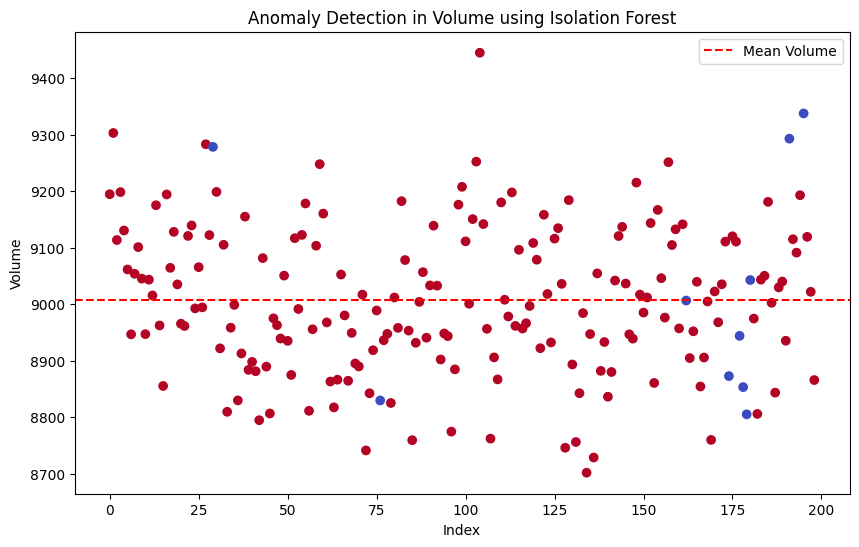

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['Volume'], c=data['Anomaly'], cmap='coolwarm', marker='o')
plt.title('Anomaly Detection in Volume using Isolation Forest')
plt.xlabel('Index')
plt.ylabel('Volume')
plt.axhline(y=data['Volume'].mean(), color='r', linestyle='--', label='Mean Volume')
plt.legend()
plt.show()

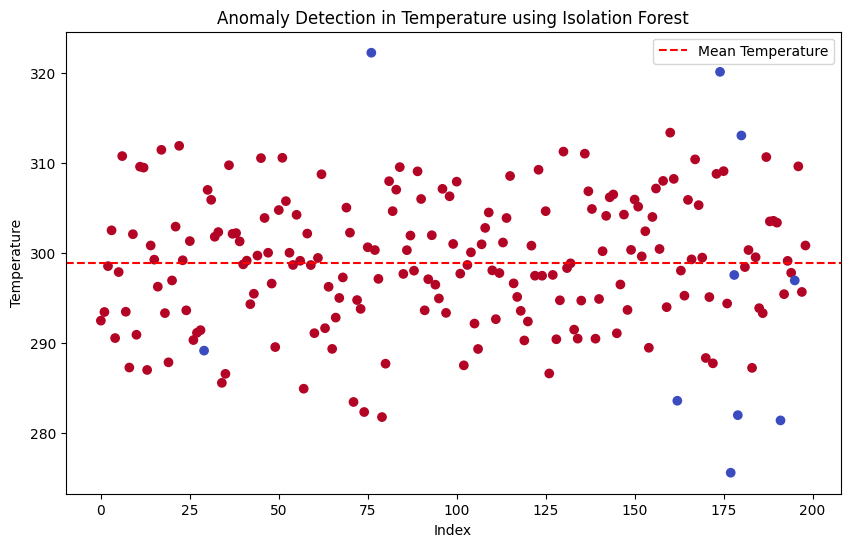

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['Temperature'], c=data['Anomaly'], cmap='coolwarm', marker='o')
plt.title('Anomaly Detection in Temperature using Isolation Forest')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.axhline(y=data['Temperature'].mean(), color='r', linestyle='--', label='Mean Temperature')
plt.legend()
plt.show()

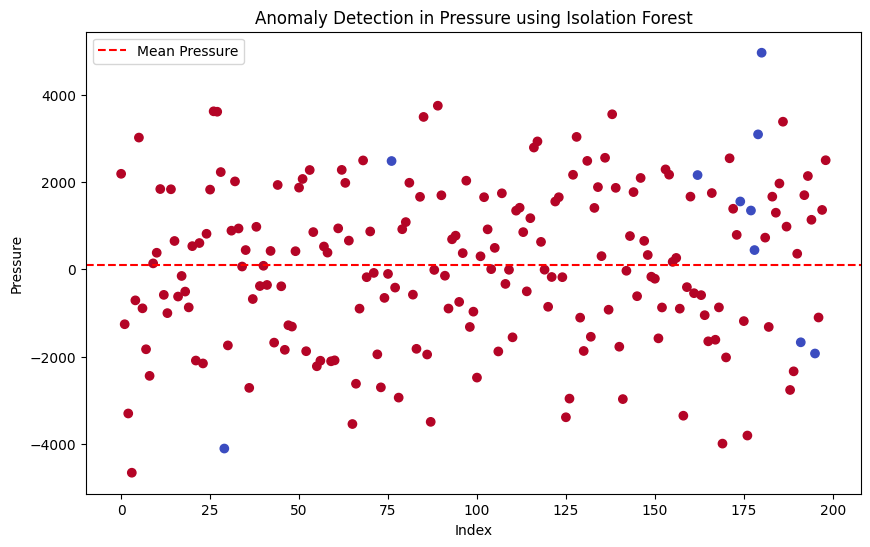

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['Pressure'], c=data['Anomaly'], cmap='coolwarm', marker='o')
plt.title('Anomaly Detection in Pressure using Isolation Forest')
plt.xlabel('Index')
plt.ylabel('Pressure')
plt.axhline(y=data['Pressure'].mean(), color='r', linestyle='--', label='Mean Pressure')
plt.legend()
plt.show()

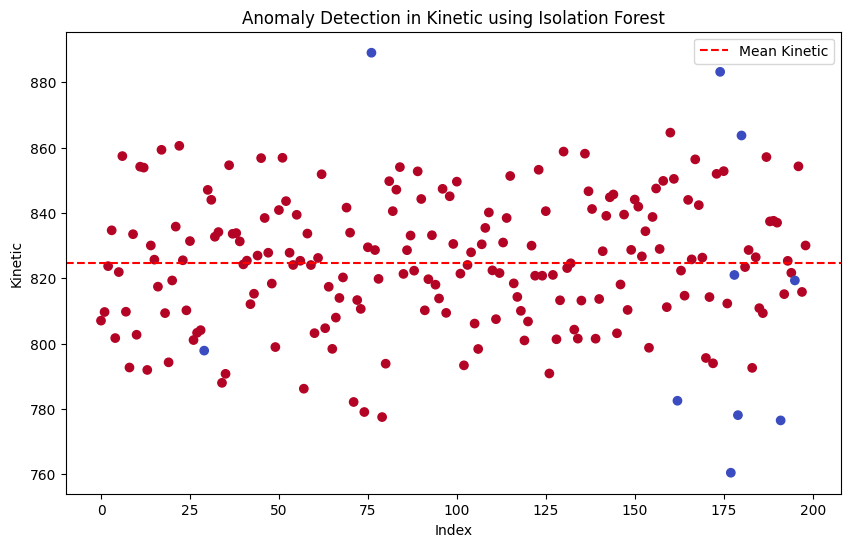

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['Kinetic'], c=data['Anomaly'], cmap='coolwarm', marker='o')
plt.title('Anomaly Detection in Kinetic using Isolation Forest')
plt.xlabel('Index')
plt.ylabel('Kinetic')
plt.axhline(y=data['Kinetic'].mean(), color='r', linestyle='--', label='Mean Kinetic')
plt.legend()
plt.show()

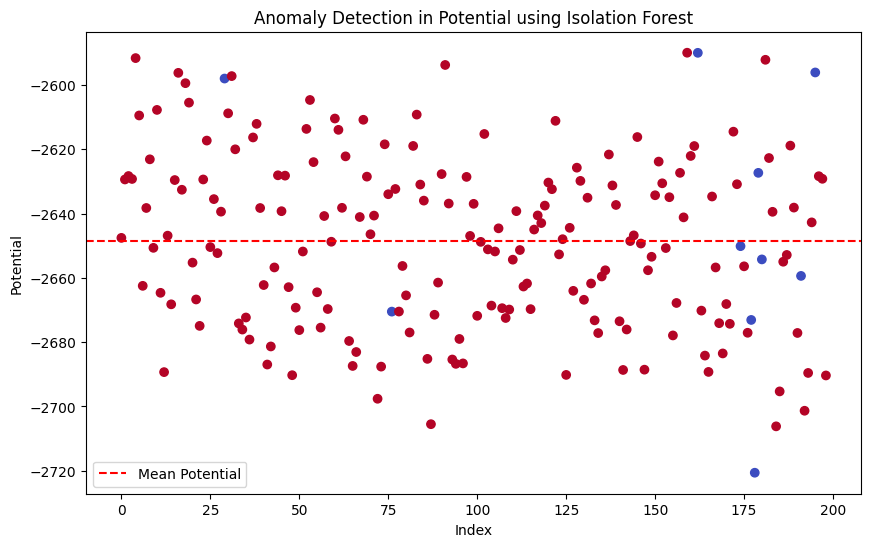

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['Potential'], c=data['Anomaly'], cmap='coolwarm', marker='o')
plt.title('Anomaly Detection in Potential using Isolation Forest')
plt.xlabel('Index')
plt.ylabel('Potential')
plt.axhline(y=data['Potential'].mean(), color='r', linestyle='--', label='Mean Potential')
plt.legend()
plt.show()

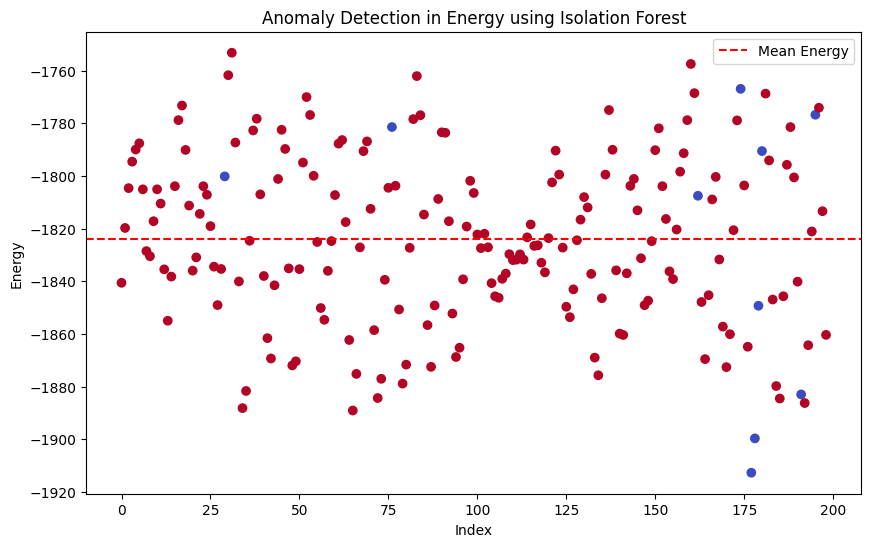

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['Energy'], c=data['Anomaly'], cmap='coolwarm', marker='o')
plt.title('Anomaly Detection in Energy using Isolation Forest')
plt.xlabel('Index')
plt.ylabel('Energy')
plt.axhline(y=data['Energy'].mean(), color='r', linestyle='--', label='Mean Energy')
plt.legend()
plt.show()

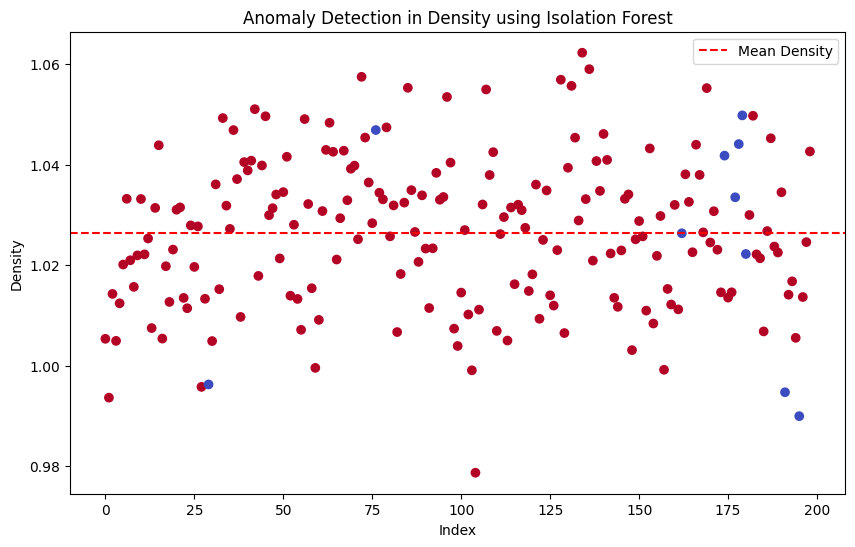

In [51]:
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['Density'], c=data['Anomaly'], cmap='coolwarm', marker='o')
plt.title('Anomaly Detection in Density using Isolation Forest')
plt.xlabel('Index')
plt.ylabel('Density')
plt.axhline(y=data['Density'].mean(), color='r', linestyle='--', label='Mean Density')
plt.legend()
plt.show()